# This practice will cover learning points in class2
### 1 - Fit MLR model in python with sklearn and statesmodel packages
### 2 - Model Selection
### 3 - Weighted regression
### 4 - Regularization, L1 and L2

Import required Python packages.

In [1]:
from pathlib import Path
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

from dmba import stepwise_selection
from dmba import AIC_score

%matplotlib inline

no display found. Using non-interactive Agg backend


Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [7]:
DATA = Path('.').resolve().parents[1] /'Practice\mlr'

HOUSE_CSV =DATA/ 'house_sales.csv'

In [8]:
print(DATA)
print(HOUSE_CSV)

/Users/siyuandong/Documents/Data Scientist Bootcamp/DataScienceProgram/Class2/Practice\mlr
/Users/siyuandong/Documents/Data Scientist Bootcamp/DataScienceProgram/Class2/Practice\mlr/house_sales.csv


#### Data read and train-test split

In [9]:
houseall = pd.read_csv('house_sales.csv', sep='\t')

house, house_test = train_test_split(houseall, test_size=0.2)

print(house.head())
print(house.shape)

print(house_test.head())
print(house_test.shape)

      DocumentDate  SalePrice  PropertyID   PropertyType          ym  zhvi_px  \
9395    2006-10-18     315000  2893000390  Single Family  2006-10-01   418300   
16963   2007-06-26     648000  6021500905  Single Family  2007-06-01   433200   
4310    2007-07-09     459000  1522069074  Single Family  2007-07-01   434200   
13784   2006-02-15     295000  4040700130  Single Family  2006-02-01   387600   
1944    2008-02-16     665000   809000560  Single Family  2008-02-01   418400   

       zhvi_idx  AdjSalePrice  NbrLivingUnits  SqFtLot  ...  Bathrooms  \
9395   0.961167      327727.0               1     7200  ...       1.75   
16963  0.995404      650992.0               1     4249  ...       1.00   
4310   0.997702      460057.0               1    95396  ...       1.50   
13784  0.890625      331228.0               1     8447  ...       2.75   
1944   0.961397      691702.0               1     4000  ...       3.50   

       Bedrooms  BldgGrade  YrBuilt  YrRenovated  TrafficNoise  Land

We can use the `LinearRegression` model from _scikit-learn_.

## 1 - Multiple Linear Regression (SKlearn)

In [10]:
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
          'Bedrooms', 'BldgGrade']

print(house[subset].head())

       AdjSalePrice  SqFtTotLiving  SqFtLot  Bathrooms  Bedrooms  BldgGrade
9395       327727.0           1610     7200       1.75         3          7
16963      650992.0           1950     4249       1.00         3          7
4310       460057.0           1610    95396       1.50         4          8
13784      331228.0           1050     8447       2.75         4          7
1944       691702.0           3140     4000       3.50         6         10


In [11]:
print(house.head())
print(house.columns)

      DocumentDate  SalePrice  PropertyID   PropertyType          ym  zhvi_px  \
9395    2006-10-18     315000  2893000390  Single Family  2006-10-01   418300   
16963   2007-06-26     648000  6021500905  Single Family  2007-06-01   433200   
4310    2007-07-09     459000  1522069074  Single Family  2007-07-01   434200   
13784   2006-02-15     295000  4040700130  Single Family  2006-02-01   387600   
1944    2008-02-16     665000   809000560  Single Family  2008-02-01   418400   

       zhvi_idx  AdjSalePrice  NbrLivingUnits  SqFtLot  ...  Bathrooms  \
9395   0.961167      327727.0               1     7200  ...       1.75   
16963  0.995404      650992.0               1     4249  ...       1.00   
4310   0.997702      460057.0               1    95396  ...       1.50   
13784  0.890625      331228.0               1     8447  ...       2.75   
1944   0.961397      691702.0               1     4000  ...       3.50   

       Bedrooms  BldgGrade  YrBuilt  YrRenovated  TrafficNoise  Land

In [12]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -536138.836
Coefficients:
 SqFtTotLiving: 234.08117282365333
 SqFtLot: -0.04652792922606398
 Bathrooms: -24624.249708635223
 Bedrooms: -46713.20548791042
 BldgGrade: 107576.23900461842


### Assessing the Model with performance KPIs
_Scikit-learn_ provides a number of metrics to determine the quality of a model. Here we use the `r2_score` and `RMSE`.

In [13]:
fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
r2 = r2_score(house[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

fitted_test = house_lm.predict(house_test[predictors])
RMSE_test = np.sqrt(mean_squared_error(house_test[outcome], fitted_test))
r2_test= r2_score(house_test[outcome], fitted_test)
print(f'RMSE_test: {RMSE_test:.0f}')
print(f'r2_test: {r2_test:.4f}')

RMSE: 268219
r2: 0.5332
RMSE_test: 231348
r2_test: 0.5759


## 1 - Multiple Linear Regression (statsmodels)

While _scikit-learn_ provides a variety of different metrics, _statsmodels_ provides a more in-depth analysis of the linear regression model. This package has two different ways of specifying the model, one that is similar to _scikit-learn_ and one that allows specifying _R_-style formulas. Here we use the first approach. As _statsmodels_ doesn't add an intercept automaticaly, we need to add a constant column with value 1 to the predictors. We can use the _pandas_ method assign for this.

In [14]:
mlr_sm = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = mlr_sm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     4144.
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:35:27   Log-Likelihood:            -2.5261e+05
No. Observations:               18149   AIC:                         5.052e+05
Df Residuals:                   18143   BIC:                         5.053e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   234.0812      4.459     52.495

### Correlations between predictors

Correlation Matrix 
                SqFtTotLiving   SqFtLot  Bathrooms  Bedrooms  BldgGrade
SqFtTotLiving       1.000000  0.190554   0.763623  0.597139   0.770019
SqFtLot             0.190554  1.000000   0.102738  0.067565   0.144696
Bathrooms           0.763623  0.102738   1.000000  0.537049   0.658901
Bedrooms            0.597139  0.067565   0.537049  1.000000   0.368354
BldgGrade           0.770019  0.144696   0.658901  0.368354   1.000000


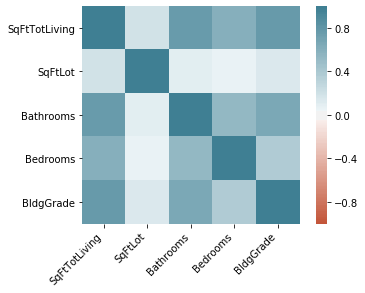

In [15]:
corr = house[predictors].corr()
print("Correlation Matrix \n {}".format(corr))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## 2 - Model Selection and Stepwise Regression

In [16]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated', 
              'NewConstruction']

print(house[predictors].head())

print("\n PropertyType List \n{}".format(house['PropertyType'].value_counts(dropna=False)))

X = pd.get_dummies(house[predictors], drop_first=True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]

print("\nPredictors after nominal varibale(s) treatment: {} \n\n".format(X.shape))

house_full = sm.OLS(house[outcome], X.assign(const=1))
results = house_full.fit()
print(results.summary())

       SqFtTotLiving  SqFtLot  Bathrooms  Bedrooms  BldgGrade   PropertyType  \
9395            1610     7200       1.75         3          7  Single Family   
16963           1950     4249       1.00         3          7  Single Family   
4310            1610    95396       1.50         4          8  Single Family   
13784           1050     8447       2.75         4          7  Single Family   
1944            3140     4000       3.50         6         10  Single Family   

       NbrLivingUnits  SqFtFinBasement  YrBuilt  YrRenovated  NewConstruction  
9395                1                0     1974            0            False  
16963               1              420     1937         1995            False  
4310                1                0     1959         2009            False  
13784               1                0     1961            0            False  
1944                1              860     1929         2010            False  

 PropertyType List 
Single Family    1

We can use the `stepwise_selection` method from the _dmba_ package.

In [17]:
y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, 
                                                verbose=True)

print()
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=519043.64, constant
Step: score=507276.08, add SqFtTotLiving
Step: score=505574.55, add BldgGrade
Step: score=503596.88, add YrBuilt
Step: score=503259.49, add Bedrooms
Step: score=503147.31, add Bathrooms
Step: score=503081.77, add PropertyType_Townhouse
Step: score=503079.99, add SqFtFinBasement
Step: score=503078.80, add SqFtLot
Step: score=503078.80, unchanged None

Intercept: 6152843.019
Coefficients:
 SqFtTotLiving: 202.70299936801194
 BldgGrade: 139484.36486848095
 YrBuilt: -3550.351682995828
 Bedrooms: -50994.29630664022
 Bathrooms: 36887.59054382306
 PropertyType_Townhouse: 65530.43158217622
 SqFtFinBasement: 10.818611099330226
 SqFtLot: 0.12152011589917051


## 3 - Weighted regression
For the house data recent sale price is more relavent for future prediction, old sale data is less reliable, therefore, we like to emphasis the recent sale data by apply more weight. We will use year the house sale to 2005 as weight.

We can calculate the Year from the date column using either a list comprehension or the data frame's `apply` method.

In [18]:
print("\nDocumentDate List \n{}".format(house['DocumentDate'].value_counts(dropna=False)))


DocumentDate List 
2006-08-24    49
2006-07-26    48
2006-04-25    45
2006-06-28    45
2006-05-22    45
2006-06-01    45
2006-05-01    43
2006-06-13    42
2006-06-19    42
2006-05-25    42
2006-07-18    42
2006-06-08    40
2006-02-21    40
2006-06-21    40
2006-07-24    39
2006-08-21    38
2006-05-30    38
2006-08-04    38
2006-08-25    37
2006-06-12    37
2006-06-26    37
2006-08-23    37
2006-04-26    37
2006-03-01    37
2006-07-11    37
2006-05-08    37
2006-08-29    36
2006-08-01    36
2006-03-20    36
2006-03-27    35
              ..
2014-05-05     1
2012-09-24     1
2014-03-15     1
2006-03-26     1
2010-05-22     1
2015-02-23     1
2010-12-12     1
2014-03-07     1
2008-11-28     1
2013-01-22     1
2008-12-24     1
2009-09-26     1
2012-07-19     1
2013-10-23     1
2007-10-14     1
2006-08-27     1
2013-10-02     1
2006-10-01     1
2010-01-05     1
2006-09-02     1
2007-08-18     1
2011-04-23     1
2014-06-13     1
2012-02-06     1
2011-12-11     1
2009-01-14     1
2014-06-09 

In [19]:
house['Year'] = [int(date.split('-')[0]) for date in house.DocumentDate]  #list comprehension
house['Year'] = house.DocumentDate.apply(lambda d: int(d.split('-')[0]))  # apply()
house['Weight'] = house.Year - 2005 #dynamic weight

/Users/siyuandong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/siyuandong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/siyuandong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [20]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_wt = LinearRegression()
house_wt.fit(house[predictors], house[outcome], sample_weight=house.Weight)
pd.DataFrame({
    'predictor': predictors,
    'house_lm': house_lm.coef_,
    'house_wt': house_wt.coef_,
}).append({
    'predictor': 'intercept', 
    'house_lm': house_lm.intercept_,
    'house_wt': house_wt.intercept_,
}, ignore_index=True)

,predictor,house_lm,house_wt
0,SqFtTotLiving,234.081173,252.541803
1,SqFtLot,-0.046528,-0.240873
2,Bathrooms,-24624.249709,-32419.265789
3,Bedrooms,-46713.205488,-51339.959630
4,BldgGrade,107576.239005,116373.225665
5,intercept,-536138.835997,-601924.818469


       abs_residual_lm  abs_residual_wt  Year
9395      82471.470737     79065.184810  2006
16963    142600.439302    133310.336711  2007
4310      13056.989435      1370.763994  2007
13784    123510.461568    149918.818903  2006
1944     216286.218091    240616.019934  2008


Year   Abs_residual_lm    Abs_residual_wt
2006 141779.65248127384 148583.6098264762
2007 149389.8896468404 154860.05180173533
2008 142641.86228360652 147461.2445744962
2009 149391.65584416204 153877.3629848166
2010 164482.0231999801 167795.58513495207
2011 169546.11711536732 172907.34912491817
2012 172661.28618808868 175203.65530722952
2013 205025.9328541157 208497.52077303504
2014 180403.88758979968 182387.2863679903
2015 171682.04203789736 169144.32337962263


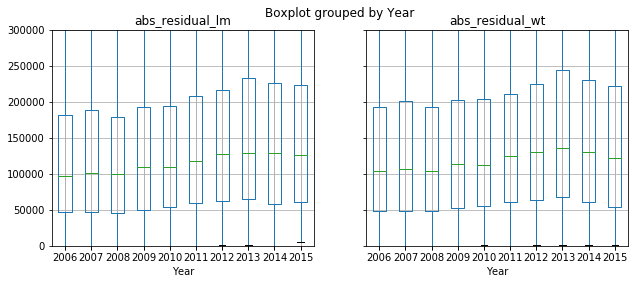

In [21]:
residuals = pd.DataFrame({
    'abs_residual_lm': np.abs(house_lm.predict(house[predictors]) - house[outcome]),
    'abs_residual_wt': np.abs(house_wt.predict(house[predictors]) - house[outcome]),
    'Year': house['Year'],
})
print(residuals.head())
axes = residuals.boxplot(['abs_residual_lm', 'abs_residual_wt'], by='Year', figsize=(10, 4))
axes[0].set_ylim(0, 300000)

print("\n\nYear   Abs_residual_lm    Abs_residual_wt")
for year, group in residuals.groupby('Year'):
    print(year, np.mean(group['abs_residual_lm']), np.mean(group['abs_residual_wt']))

Seems only help 2015 prediction reduce the residuale.If we have a recent holdout sample we can test the weight could help for furture prediction or not

# 4 - Regularization

In [22]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated', 
              'NewConstruction']

outcome = 'AdjSalePrice'

print(house[predictors].head())

print("\n PropertyType List \n{}".format(house['PropertyType'].value_counts(dropna=False)))

X_train = pd.get_dummies(house[predictors], drop_first=True)
X_train['NewConstruction'] = [1 if nc else 0 for nc in X_train['NewConstruction']]
y_train = house[outcome]

X_test = pd.get_dummies(house_test[predictors], drop_first=True)
X_test['NewConstruction'] = [1 if nc else 0 for nc in X_test['NewConstruction']]
y_test = house_test[outcome]

       SqFtTotLiving  SqFtLot  Bathrooms  Bedrooms  BldgGrade   PropertyType  \
9395            1610     7200       1.75         3          7  Single Family   
16963           1950     4249       1.00         3          7  Single Family   
4310            1610    95396       1.50         4          8  Single Family   
13784           1050     8447       2.75         4          7  Single Family   
1944            3140     4000       3.50         6         10  Single Family   

       NbrLivingUnits  SqFtFinBasement  YrBuilt  YrRenovated  NewConstruction  
9395                1                0     1974            0            False  
16963               1              420     1937         1995            False  
4310                1                0     1959         2009            False  
13784               1                0     1961            0            False  
1944                1              860     1929         2010            False  

 PropertyType List 
Single Family    1

### Regular Multiple Regression

In [23]:
house_lm = LinearRegression()
house_lm.fit(X_train, y_train)

mlr_coefs = dict(
    zip(['Intercept'] + X_train.columns.tolist()[:-1], 
        np.round(np.concatenate((house_lm.intercept_, house_lm.coef_), 
                                axis=None), 3))
)

mlr_coefs

{'Intercept': 6181070.277,
 'SqFtTotLiving': 202.798,
 'SqFtLot': 0.119,
 'Bathrooms': 37845.103,
 'Bedrooms': -50735.242,
 'BldgGrade': 139260.017,
 'NbrLivingUnits': 1164.566,
 'SqFtFinBasement': 10.288,
 'YrBuilt': -3576.882,
 'YrRenovated': -3.173,
 'NewConstruction': -1659.347,
 'PropertyType_Single Family': 22321.216}

In [24]:
fitted_test = house_lm.predict(X_test)
MSE_test = np.sqrt(mean_squared_error(y_test, fitted_test))
r2 = r2_score(y_test, fitted_test)
print(f'regular mlr MSE: {MSE_test:.0f}')
print(f'r2_test: {r2:.4f}')

regular mlr MSE: 213758
r2_test: 0.6379


### L2 - Ridge regression (Parameter shrinkage)

In [25]:
ridge_cv = RidgeCV(normalize=True, alphas=np.logspace(-10, 1, 400))
ridge_model = ridge_cv.fit(X_train, y_train)
ridge_prediction = ridge_model.predict(X_test)
ridge_mae = np.mean(np.abs(y_test - ridge_prediction))
ridge_coefs = dict(
    zip(['Intercept'] + X_train.columns.tolist()[:-1], 
        np.round(np.concatenate((ridge_model.intercept_, ridge_model.coef_), 
                                axis=None), 3))
)

print('Ridge Regression MAE: {}'.format(np.round(ridge_mae, 3)))
print('Ridge Regression coefficients:')
ridge_coefs

Ridge Regression MAE: 134659.834
Ridge Regression coefficients:


{'Intercept': 6054543.677,
 'SqFtTotLiving': 198.213,
 'SqFtLot': 0.131,
 'Bathrooms': 39315.641,
 'Bedrooms': -49288.143,
 'BldgGrade': 138960.679,
 'NbrLivingUnits': -4702.932,
 'SqFtFinBasement': 13.28,
 'YrBuilt': -3502.708,
 'YrRenovated': -1.991,
 'NewConstruction': -1710.044,
 'PropertyType_Single Family': 11463.788}

### L1 - Lasso regression (Parameter sparsity)

In [26]:
lasso_cv = LassoCV(normalize=True, alphas=np.logspace(-10, 1, 400))
lasso_model = lasso_cv.fit(X_train, y_train)
lasso_prediction = lasso_model.predict(X_test)
lasso_mae = np.mean(np.abs(y_test - lasso_prediction))
lasso_coefs = dict(
    zip(['Intercept'] + X_train.columns.tolist()[:-1], 
        np.round(np.concatenate((lasso_model.intercept_, lasso_model.coef_), axis=None), 3))
)

print('LASSO MAE: {}'.format(np.round(lasso_mae, 3)))
print('LASSO coefficients:')
lasso_coefs

/Users/siyuandong/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LASSO MAE: 134549.433
LASSO coefficients:


{'Intercept': 5922422.267,
 'SqFtTotLiving': 200.176,
 'SqFtLot': 0.077,
 'Bathrooms': 33634.066,
 'Bedrooms': -47293.233,
 'BldgGrade': 139066.266,
 'NbrLivingUnits': -345.682,
 'SqFtFinBasement': 10.514,
 'YrBuilt': -3431.097,
 'YrRenovated': -0.0,
 'NewConstruction': -0.0,
 'PropertyType_Single Family': -0.0}

# Home Work

1. Compare the three model fits and draw conclusion 
from the comparision of the three model firt regarding there coefficent difference

2. Show the three model performance on both tran and test